<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/kohonenAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [129]:
class KohonenNetwork():
  def __init__(self, iterations, lambda_distance, topology_dim, img):
    """
      Initialization of perceptron trainer.

      Args:
        iterations (integer) - number of iterations.
        lambda_distance (integer) - maximum distance from winner neuron to neighbours.
        topology_dim ((integer, integer)) - dimension of topology.
        img (NumPy array) - original, colorful image.
    """
    self.iterations = iterations
    self.lambda_distance = lambda_distance
    self.rows = topology_dim[0]
    self.cols = topology_dim[1]
    self.img = img
    self.weights = np.random.uniform(0.0, 1.0, (self.rows, self.cols, 3))

  def closest_color(self, point):
    """
      Finds the closest color in weights realted to point.

      Args:
        point (float, float, float) - RGB [0-1] color value of point.
    """
    distances = []
    [distances.append(
      np.sqrt(np.sum((point - self.weights[i][j]) ** 2))
    ) for i in range(self.rows) for j in range(self.cols)]

    closest = np.argmin(distances)
    x_coord = int(closest // self.cols)
    return x_coord, closest - x_coord * self.cols

  def edges_distance(self, x1, y1, x2, y2):
    """
      Finds the neighbours in weights topology, distant from at most lambda.

      Args:
        x1 (integer) - coordinate x of closest color in weights related to point.
        y1 (integer) - coordinate y of closest color in weights related to point.
        x2 (integer) - coordinate x of currently being processed point.
        y2 (integer) - coordinate y of currently being processed point.
    """
    return np.abs(x2 - x1) + np.abs(y2 - y1)
  
  def G(self, distance):
    """
      Gaussian neighbourhood function.

      Args:
        distance (integer): distance from closest point to currently being processed.
    """
    return np.exp(-(distance ** 2) / (2 * self.lambda_distance ** 2))

  def ALPHA(self, t):
    """
      Function decreasing with the progress of the algorithm.

      Args:
        t (integer): current iteration.
    """
    return 1.0 - (t - 1.0) / self.iterations

  def train(self):
    """Learning network"""
    for t in range(self.iterations):
      x = np.random.randint(0, self.img.shape[0])
      y = np.random.randint(0, self.img.shape[1])
      point = self.img[x, y] / 255.0
      closest_x, closest_y = self.closest_color(point)

      for i in range(self.rows):
        for j in range(self.cols):
          distance = self.edges_distance(closest_x, closest_y, i, j)
          if distance <= self.lambda_distance:
            self.weights[i][j] += self.ALPHA(t) * self.G(distance) * (point - self.weights[i][j])
    
  def present_colors(self):
    """Shows colors from weights in 3d plot"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    for i in range(self.rows):
      for j in range(self.cols):
        r = int(self.weights[i][j][0] * 255.0)
        g = int(self.weights[i][j][1] * 255.0)
        b = int(self.weights[i][j][2] * 255.0)
        ax.scatter(r, g, b, c = '#%02x%02x%02x' % (r, g, b))
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)
  
  def present_new_image(self):
    """Shows new image which uses color only from weights"""
    DIST_IMAGE = np.zeros(SRC_IMAGE.shape)
    for x in range(SRC_IMAGE.shape[0]):
      for y in range(SRC_IMAGE.shape[1]):
        point = SRC_IMAGE[x, y] / 255.0
        closest_x, closest_y = self.closest_color(point)
        DIST_IMAGE[x, y] = self.weights[closest_x][closest_y]

    plt.imshow(DIST_IMAGE)

In [133]:
SRC_IMAGE = plt.imread('fruits.jpg')
# SRC_IMAGE = plt.imread('vegs.jpg')
# SRC_IMAGE = plt.imread('landscape.jpg')

In [134]:
kohonen_network = KohonenNetwork(
  iterations=30000,
  lambda_distance=1,
  topology_dim=(6, 6),
  img=SRC_IMAGE
)
kohonen_network.train()

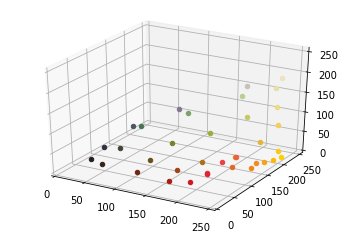

In [135]:
kohonen_network.present_colors()

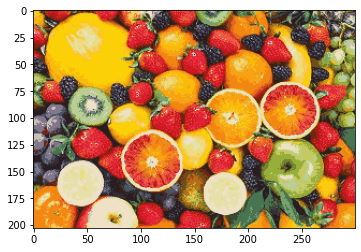

In [136]:
kohonen_network.present_new_image()

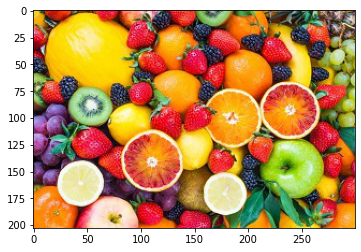

In [137]:
plt.imshow(SRC_IMAGE)